In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import sys
project_path = '../'
sys.path.append(project_path)
from backtest_utils import TradingSimulator
import pickle, os
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import figure
from pprint import pprint

# Run a Backtest

In [3]:
strategy_name = 'smooth_operator'

TS = TradingSimulator(strategy_name)

# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = project_path + 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [4]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [5]:
stock_symbols_pickle = project_path + 'stock_symbols.pkl'  # Name of the pickle file
# TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

In [6]:
from backtest_utils import TradingSimulator
start_date = '1980-01-01'
end_date = '2010-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 30  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 0
portfolio_starting_value = 100000
risk_pct = 0.1
reinvest_profits_bool = True
leverage_multiplier = 1.0
strategy_name = 'smooth_operator'
save_test = True

# Run the backtest
''' 
BEST TEST RESULTS
TS_leverage = TradingSimulator(strategy_name)
risk_pct = 0.05
leverage_multiplier = 3.0
long_count = 10
short_count = 0
reinvest_profits_bool = False
test_2 = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)

'''
TS_leverage = TradingSimulator(strategy_name)
risk_pct = 0.05
leverage_multiplier = 1.0
long_count = 10
short_count = 0
reinvest_profits_bool = False
rebalance_frequency = 30  # In days
test_1 = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)

TS_leverage = TradingSimulator(strategy_name)
risk_pct = 0.10
leverage_multiplier = 1.0
long_count = 10
short_count = 0
reinvest_profits_bool = False
rebalance_frequency = 30  # In days
test_2 = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)

TS_leverage = TradingSimulator(strategy_name)
risk_pct = 0.05
leverage_multiplier = 1.0
long_count = 10
short_count = 0
reinvest_profits_bool = False
rebalance_frequency = 15  # In days
test_1 = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)

TS_leverage = TradingSimulator(strategy_name)
risk_pct = 0.05
leverage_multiplier = 1.0
long_count = 10
short_count = 10
reinvest_profits_bool = False
rebalance_frequency = 15  # In days
test_1 = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)

Running backtest: 2010-12-19 - 2010-12-31: 100%|██████████| 378/378 [15:50<00:00,  2.51s/it, Profit=-1.8e+3] 


Backtest results saved to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_0.pkl


Running backtest: 2010-12-19 - 2010-12-31: 100%|██████████| 378/378 [15:51<00:00,  2.52s/it, Profit=-4805.23]


Backtest results saved to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_1.pkl


Running backtest: 2010-12-19 - 2010-12-31: 100%|██████████| 755/755 [46:37<00:00,  3.70s/it, Profit=2935.35] 


Backtest results saved to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_2.pkl


Running backtest: 2010-12-19 - 2010-12-31: 100%|██████████| 755/755 [46:27<00:00,  3.69s/it, Profit=955]     


Backtest results saved to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_3.pkl


# BACKTEST ANALYSIS

In [7]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests, BackTestManager
import quantstats_lumi as qs
BTM = BackTestManager()

In [8]:
backtests_table = BTM.remake_backtests_table()
backtests_table = BTM.load_backtests_table()
# show me all columns except 'symbols'
backtests_table.drop(columns=['symbols'], inplace=True)
# backtests_table[backtests_table['reinvest_profits_bool'] == False][backtests_table['strategy_name'] == 'smooth_operator']
backtests_table['test_filename'] = backtests_table['test_filename'].apply(lambda x: x.split('/')[-1])
# Convert test_run_dt to datetime
backtests_table['test_run_dt'] = pd.to_datetime(backtests_table['test_run_dt'])
# Convert test_run_dt to string
backtests_table['test_run_dt'] = backtests_table['test_run_dt'].dt.strftime('%y-%m-%d %H:%M:%S')
backtests_table.transpose()

{'backtest_files': ['.DS_Store', 'backtests_table.csv', 'Test_1.pkl', 'Test_0.pkl', 'Test_2.pkl', 'Test_3.pkl']}
Remade backtests table


,3,2,0,1
test_run_dt,24-03-15 07:20:46,24-03-15 06:33:53,24-03-15 05:46:48,24-03-15 05:30:28
strategy_name,smooth_operator,smooth_operator,smooth_operator,smooth_operator
start_date_dt,1980-01-01,1980-01-01,1980-01-01,1980-01-01
end_date_dt,2010-12-31,2010-12-31,2010-12-31,2010-12-31
rebalance_frequency,15,15,30,30
long_count,10,10,10,10
short_count,10,0,0,0
portfolio_starting_value,100000,100000,100000,100000
risk_pct,0.05,0.05,0.1,0.05
reinvest_profits_bool,False,False,False,False


In [9]:
# Create reports for all tests that don't have reports
for test_num in range(len(backtests_table)):
    test = BTM.load_test(test_num)
    backtests_table.iloc[test_num]['test_filename']
    test_file_path = BTM.get_test_filepath_from_backtests_table(test_num)
    report_filepath = test_file_path.replace('.pkl', '_analysis.html')
    if not os.path.exists(report_filepath):
        BacktestAnalyzer(test).create_test_full_tearsheet(test_num)
        print(f"Saved report to {report_filepath}")

/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Profit in Mn: 1.765354415335523
Saved report to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_3_analysis.html


/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Profit in Mn: 2.09494491480294
Saved report to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_2_analysis.html


/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Profit in Mn: 1.3175132289910543
Saved report to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_1_analysis.html


/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Profit in Mn: 1.2811926396712194
Saved report to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_0_analysis.html


In [14]:
# Choose Test
test_num = 2
test = BTM.load_test(test_num)

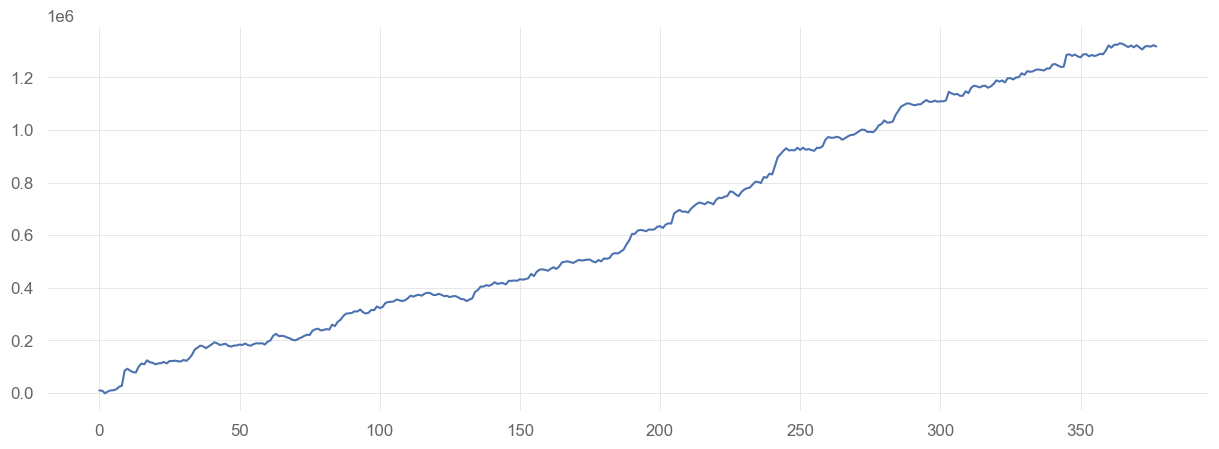

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(test['backtest_profits']))

In [16]:
BA = BacktestAnalyzer(test)
# Create orders df
orders_df = BA.create_orders_df()

final_dict = BA.test_metrics_orders(orders_df)
pprint(final_dict, sort_dicts=False)

{'total': {'win_ratio': 0.3873015873015873,
           'average_win': 2126.76453060257,
           'average_loss': -883.4579654752134,
           'risk_reward_ratio': 2.4073183034334633,
           'pct_of_stoploss_hit': 0.5484126984126985,
           'probability_of_profit': 0.9323582000599445}}


In [13]:
# Give me the top 10 shorted assets
short_orders_df = orders_df[orders_df['direction'] == -1.0]
top_10_shorted_assets =  orders_df['symbol'].value_counts().head(10).index

# use the eye ball function to see the trades for the top 10 traded assets on one big graph with subplots

pruned_orders_df = short_orders_df
for i, symbol in enumerate(top_10_shorted_assets):
    asset_data, min_date, max_date, ax = BA.eyeball_symbol(symbol, test, pruned_orders_df, figsize=(15, 6), orders_to_show=1)
    ax.set_title(symbol)
    ax.set_ylabel('Price')
    ax.set_xlabel('Date')
    ax.legend()
    
# # Give me the top 10 traded assets
# top_10_traded_assets =  orders_df['symbol'].value_counts().head(10).index

# pruned_orders_df = orders_df
# for i, symbol in enumerate(top_10_shorted_assets):
#     asset_data, ax = BA.eyeball_symbol(symbol, test, pruned_orders_df)
#     ax.set_title(symbol)
#     ax.set_ylabel('Price')
#     ax.set_xlabel('Date')
#     ax.legend()


ValueError: a must be greater than 0 unless no samples are taken